## <font color = E0FFFF> Business Understanding </font>
Klasifikasi ini dilakukan untuk memudahkan menentukan kualitas Wine.

Karena banyaknya orang yang belum paham untuk menentukan wine jadi saya memutuskan mengklasifikasi data data tersebut dan menentukan mana kualitas produk wine yang baik dan yang buruk,
karena tidak sedikit juga orang yang salah membeli atau tertipu dengan produk wine. 
Karena itu kami akan mempermudah mengetahuinnya dengan cara mengklasifikasin kualitas wine yang baik dan yang buruk

Klasifikasi ini dilakukan dengan menggunakan data yang bersumber dari https://www.kaggle.com/datasets/nareshbhat/wine-quality-binary-classification

## Tentukan library yang akan digunakan

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.svm import SVC 

## <font color = E0FFFF> Data Understanding </font>
 
 Variables input 

- fixed acidity	                : yaitu keasaman tetap pada anggur
- volatile acidity              : yaitu keasaman volatil pada anggur
- citric acid                   : yaitu asam sitrat pada anggur
- residual sugar                : yaitu sisa gula anggur
- chlorides                     : yaitu klorida anggur
- FSD (free sulfur dioxide)     : yaitu kebebasan sulfur dioksida anggur
- TFD (total sulfur dioxide)    : yaitu total sulfur dioksida anggur
- density                       : yaitu kepadatan anggur
- pH : yaitu semacam skala untuk mengukur tingkat keasaman atau kebasaan suatu larutan.
- sulphates                     :  yaitu garam yang diperoleh dari asam sulfat dan mineral atau radikal organik
- sulphates                     :  yaitu kadar alcohol yang berada pada anggur

Variable Output
- quality                       : Kualitas Anggur

Dengan ini semua saya akan melakukan klasifikasi dengan metode "Regresi Linear" dan "Support Vector Machine (SVM)"

## <font color = E0FFFF> Data Preparation </font>

In [2]:
df = pd.read_csv('wine.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<Axes: >

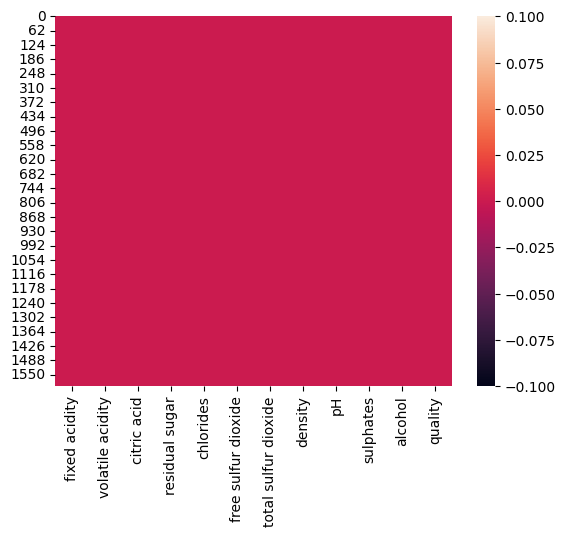

In [6]:
sns.heatmap(df.isnull())

In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,0.534709
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.498950
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,1.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,1.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


<Axes: >

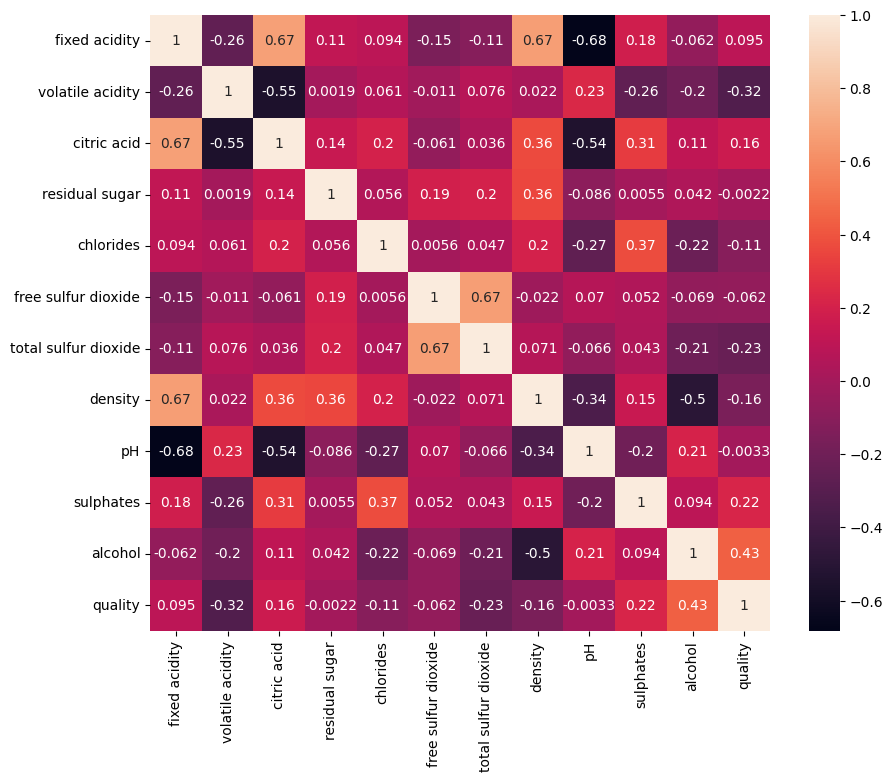

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

## <font color = E0FFFF> Modeling </font>

In [9]:
X = df.drop(columns='quality', axis=1)
Y = df['quality']

In [10]:
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides   
0               7.4             0.700         0.00             1.9      0.076  \
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [11]:
print(Y)

0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: quality, Length: 1599, dtype: int64


In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state= 2)

In [13]:
print(X.shape, X_train.shape, X_test.shape)

(1599, 11) (1279, 11) (320, 11)


In [14]:
model = LogisticRegression()

In [15]:
from sklearn import svm

model2 = svm.SVC(kernel='linear')
model2.fit(X_train,Y_train)

SVC(kernel='linear')

In [16]:
model.fit(X_train, Y_train)

c:\Users\YULINAWATI\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## <font color = E0FFFF> Evaluasi model </font>

In [17]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score (X_train_prediction, Y_train)

In [18]:
print('Akurasi Data Training :', training_data_accuracy)

Akurasi Data Training : 0.7490226739640344


In [19]:
X_test_prediction = model2.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [20]:
print('Akurasi Data Testing :', test_data_accuracy)

Akurasi Data Testing : 0.740625


In [21]:
input_data = (7.8,0.64,0.0,1.9,0.07200000000000001,27.0,55.0,0.9962,3.31,0.63,11.0)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==0):
    print('Kualitas Anggur Baik')
else :
    print('Kualitas Anggur Buruk')
    

[1]
Kualitas Anggur Buruk


c:\Users\YULINAWATI\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [22]:
input_data = (7.8,0.645,0.0,2.0,0.08199999999999999,8.0,16.0,0.9964,3.38,0.59,9.8)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==0):
    print('Kualitas Anggur Baik')
else :
    print('Kualitas Anggur Buruk')
    

[0]
Kualitas Anggur Baik


c:\Users\YULINAWATI\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [23]:
input_data = (11.2,0.4,0.5,2.0,0.099,19.0,50.0,0.99783,3.1,0.58,10.4)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = model2.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==0):
    print('Kualitas Anggur Baik')
else :
    print('Kualitas Anggur Buruk')
    

[1]
Kualitas Anggur Buruk


c:\Users\YULINAWATI\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [24]:
input_data = (5.6,0.31,0.78,13.9,0.07400000000000001,23.0,92.0,0.99677,3.39,0.48,10.5)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = model2.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==0):
    print('Kualitas Anggur Baik')
else :
    print('Kualitas Anggur Buruk')

[0]
Kualitas Anggur Baik


c:\Users\YULINAWATI\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


## <font color = E0FFFF> Deployment </font>

## Simpan model

In [25]:
import pickle

In [26]:
filename = 'prediksi_wine.sav'
pickle.dump(model, open(filename, 'wb'))